## Final Project Submission

Please fill out:
* Student name: Fahima Hyder
* Student pace: self paced / part time / full time: Part Time
* Scheduled project review date/time: December 19, 2018. 1015a,
* Instructor name: Jeff Herman
* Blog post URL: https://fhyder.github.io/the_trials_and_tribulations_of_my_final_project_for_module_1


In [1]:
#Let's import all the libraries we love :) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [2]:
#Now lets load our data into a readable dataframe using pandas

df = pd.read_csv('kc_house_data.csv')
df.head() # lets see what we're working with 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Essential info on columns (before any manipulation):

1) **id:** a notation for a house

2) **date:** Date house was sold

3) **price:** Price is prediction target

4) **bedrooms:** Number of Bedrooms/House

5) **bathrooms:** Number of bathrooms/bedrooms

6) **sqft_living:** square footage of the home

7) **sqft_lot:** square footage of the lot

8) **floors:** Total floors (levels) in house

9) **waterfront:** House which has a view to a waterfront

10) **view:** Has been viewed

11) **condition:** How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent. 

12) **grade:** Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.

13) **sqft_above:** Square footage of house apart from basement

14) **sqft_basement:** Square footage of the basement

15) **yr_built:** Year built

16) **yr_renovated:** Year when house was renovated

17) **zipcode:** zipcode

18) **lat:** Latitude coordinate

19) **long:** Longitude coordinate

20) **sqft_living15:** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

21) **sqft_lot15:** lotSize area in 2015(implies-- some renovations)

## Before analyzing any of the data let's make sure that we clean the set to account for any missing values or placeholder variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We see here that we have two columns that are cast as objects (strings). Date can be cast as a string but I assume that sqft_basement should be presented as numbers and not strings. Just to be sure lets observe the unique values of sqft_basement. 

In [5]:
df.sqft_basement.unique()


array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Upon observation, our unique values confirm that a bunch of number values has been cast as strings and need to be changed to floats. However, I also noticed that one of the values present is '?'. This variable needs to be dealt with. First, lets see how many ?'s are actually present in the series before deciding our strategy in eliminating them

In [6]:
question_count = 0
for i in df.sqft_basement:
    if i == '?':
        question_count += 1
question_count   
#only 454....lets replace with median or mode


454

Of 21,597 entries only 454 of them are '?' in the sqft_basement series. It's safe to assume that changing these values to the mean of the series won't effect the outcome of the data much. In order to proceed we must find the mean of the series. I will create a copy of the series with the ?'s eliminated, cast it as a float, and then determine the median of the set. I'll then replace all the ?'s in our original dataframe with the median of the series.

In [7]:
non_q = df.loc[df['sqft_basement']!='?']

In [8]:
non_q.sqft_basement.unique() #checks for ?s

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [9]:
sqft = non_q.sqft_basement.astype(float)

mn = sqft.mean()
md = sqft.mode()
mdn = sqft.median()
mn, md, mdn

print('Mean:', mn, 'Median:', mdn, 'Mode:', md)
# okay so lets make all the ? in 0

Mean: 291.851723974838 Median: 0.0 Mode: 0    0.0
dtype: float64


In [10]:
df.sqft_basement.replace(to_replace = '?', value = '0.0', inplace=True) # wonder if this workedddddd

In [11]:
df.sqft_basement.unique() ### yay now lets cast it as a float

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [12]:
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement.dtype # okay that worked lets see how much the mean is affected

dtype('float64')

In [13]:
df.sqft_basement.mean(), mn

#great! not much at all okay lets check the date anyway

(285.7165810066213, 291.851723974838)

In [14]:
df.date.head() # I feel comfortable leaving this series this as an object. okay now lets check for null values

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Okay so our sqft_basement has been cast as a float and the ?'s have been replaced with the median. However, it is clear that there is data missing in the waterfront, view, and yr_renovated series. Let's do some more exploratory analysis to figure out how to manipulate these series

In [16]:
df.isna().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For view, the null values are so small compared to the entire series that it is safe to assume that replacing them with median values won't have skew the results of the series much. However, null values in yr_renovated and waterfront are much higher so before using the same method I'd like to see what type of consequences doing so will have on the mean. 

In [17]:
df.floors.fillna(df.floors.median())

df.floors.isna().sum()


0

In [18]:
viewmn = df.view.mean()
df.view.median()
testview = df.view.fillna(0.0)
viewmn, testview.mean() # if I round to a 3 digits the mean is more or less the same so lets test with waterfront also

(0.23386272870808952, 0.23318053433347224)

In [19]:
# okay lets start by checking unique values because this seems like categorical data that represent boolean values
print('These are the unique values of waterfront:' + f'{df.waterfront.unique()}')
# okay seems to me that it's a true or false sort of value...perhaps best to just replace the nan with false? lets check md first

df.waterfront.mode()
#so it's safe to say that most of these don't have a waterfront view....I feel okay with replacing NAN with 0 since only about 11% of the full set is NAN in this series
df.waterfront.median() # just to be safe



These are the unique values of waterfront:[nan  0.  1.]


0.0

In [20]:
df.waterfront = df.waterfront.fillna(0.0)
df.waterfront.isna().sum() 

0

Yay! Now that my data is scrubbed lets perform some exploratory data analysis. Before jumping into our multiple linear regression model there are some initial question I am curios about.  

# Question 1: Does the square footage of the total lot have an effect on the grade assigned to the property?


# Question 2: Is there a relationship between square footage of the house and grade assigned to the property

# Question 3: Is there a relationship between yr_built and yr_renovated? 

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

First lets examine questions relating to how the house is graded.

In [22]:
grade_predictors = pd.DataFrame([])
grade_predictors['sqft_living'] = df.sqft_living
grade_predictors['sqft_lot'] = df.sqft_lot


In [23]:
grade_predictors.corr() #to make sure there isn't any multicolinearity

,sqft_living,sqft_lot
sqft_living,1.000000,0.173453
sqft_lot,0.173453,1.000000


okay so far so good lets check our histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114eca0b8>,
      dtype=object)

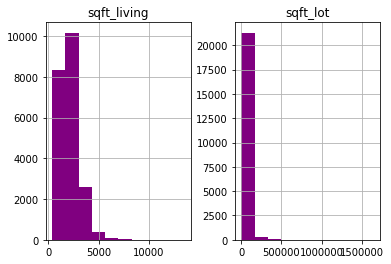

In [24]:
grade_predictors.hist(color='purple')

okay definitely need to normalize sqft of living and sqftlot but lets quickly check grade too

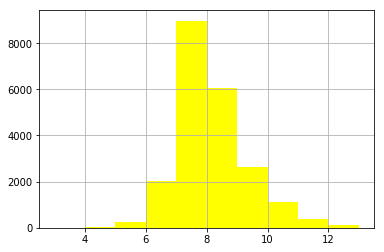

In [25]:
df.grade.hist(color='yellow')

I'd say that's pretty normal

In [26]:
log_lot = np.log(grade_predictors.sqft_lot)
log_living = np.log(grade_predictors.sqft_living)


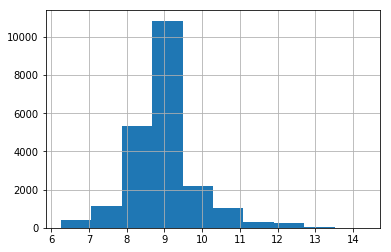

In [27]:
log_lot.hist()

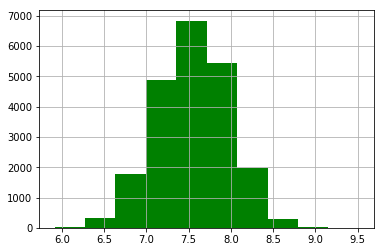

In [28]:
log_living.hist(color='green')

Great! Now lets use scatter plots to determine if there are any relationship between lotsize and livingsize with grade of the properties

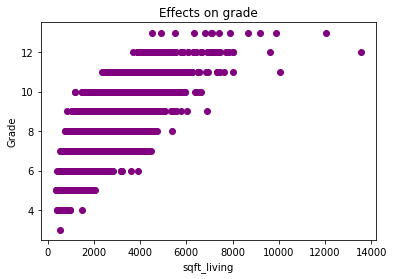

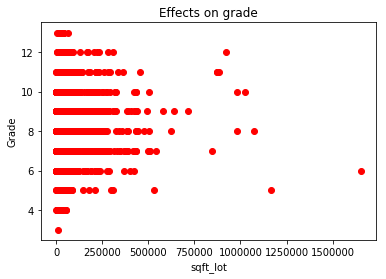

In [29]:
colors = ['purple', 'red']
z = 0
for x in grade_predictors:
    plt.scatter(grade_predictors[x], df.grade, color = colors[z], label = x)
    plt.title('Effects on grade')
    plt.legend
    plt.xlabel(x)
    plt.ylabel('Grade')
    plt.show()
    z +=1

Looking at the plots tells me that there is some relationship between the size of the house and grades. Although it's far from being perfectly linear you can see that as square feet increases the likelihood of a higher grade also increases. Furthermore,  it's clear that the highest grade you can achieve with a house <= 2,000 squarfeet is 10. Also, house > 7,000 you're pretty much guaranteed a grade above 10. As for lot square footage vs. grade there's no clear relationship between these two variables.

My intuition tells me that the older a house is the sooner it will need renovations. Let's see if there is any relationship between when a house was built and when(if) it renovated.

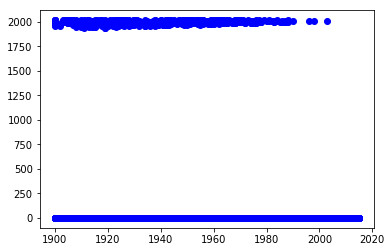

In [30]:
plt.scatter(df.yr_built, df.yr_renovated, color='blue')

Well that doesn't show us much of anything because there are so many houses that got renovated at year zero (haha), let's narrow down our data to only include houses that were renovated at all and see if there is a relaionship with yr built

In [31]:
x = df.loc[df["yr_renovated"]>0, ["yr_built"]]
y = df.loc[df["yr_renovated"]>0, ['yr_renovated']] 

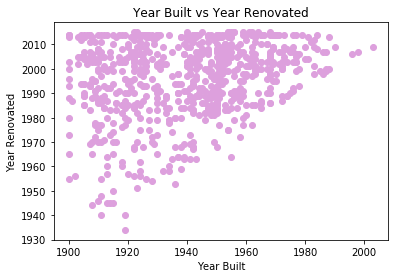

In [32]:
plt.scatter(x,y, color = 'plum')
plt.xlabel('Year Built')
plt.ylabel('Year Renovated')
plt.title('Year Built vs Year Renovated')

plt.show()

We cannot conclude that there is a direct relationship between the age of the house and the year that it was renovated but some observations can be made. 1) There are higher instances of renovations in houses built before 1960. 2) Houses tend to be renovated 10 - 20 years after they are built. 3) Except for houses built in the year 1900, in which case the first instance of a renovation made was in 1955 a whopping 55 years after the house was built. Either houses in the year 1900 were built really sturdy or people weren't as concerned with renovations back then. 

Let's move on to building our multiple linear regression model

# The assumptions of a linear regression model states the following

1) The distribution of all variables to be multivariate normal

2) Little to no multicollinearity in the data

3) The data is homeocedastic

4) The relationship between the independent and dependent variable must be linear

We will test this assumptions against the data to ultimatey determing which feature best predicts the outcome of our target variable, price

# Assumption 1: Little to no multicollinearity in our data 

In [33]:
abs(df.corr()) > 0.74

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Correlations worth noting:
* sqft_living & bathroom have a correlation of 0.755758
* sqft_living & sqft_above have a correlation of 0.87644 
* sqft_living and sqft_living15 have a correlation of 0.876448 


Lets examine further

In [34]:
corr = pd.DataFrame([])
corr['living'] = df.sqft_living
corr['price'] =  df.price
corr['bathroom'] = df.bathrooms
corr['sq15'] =  df.sqft_living15
corr['sqabv'] = df.sqft_above
corr['grade'] = df.grade
corr.corr() 

,living,price,bathroom,sq15,sqabv,grade
living,1.000000,0.701917,0.755758,0.756402,0.876448,0.762779
price,0.701917,1.000000,0.525906,0.585241,0.605368,0.667951
bathroom,0.755758,0.525906,1.000000,0.569884,0.686668,0.665838
sq15,0.756402,0.585241,0.569884,1.000000,0.731767,0.713867
sqabv,0.876448,0.605368,0.686668,0.731767,1.000000,0.756073
grade,0.762779,0.667951,0.665838,0.713867,0.756073,1.000000


The variable, sqft_living, has the highest instances of collinearity with predictor variables so it may same instinct to remove this variable. However, sqft_living also has the highest correlation with price so instead I'm going to a drop all the other vars to eliminate multicollinearity.

In [35]:
df = df.drop(['sqft_living15', 'grade', 'sqft_above', 'bathrooms', ], axis = 1)



In [36]:
abs(df.corr()) > 0.74 #just checking

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c249ee588>,
      dtype=object)

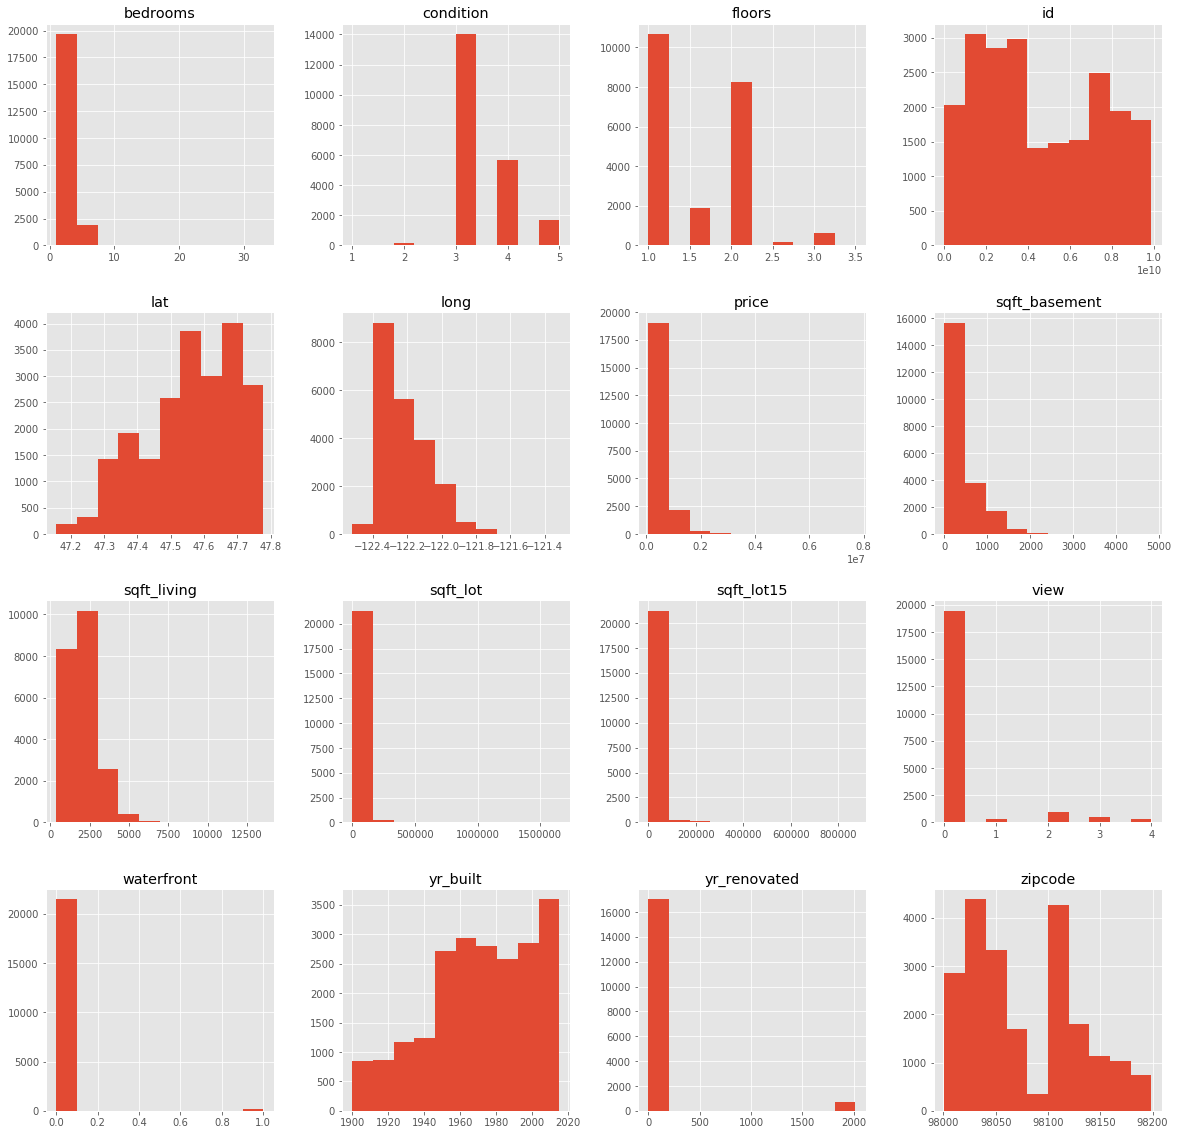

In [37]:
plt.style.use('ggplot')
df.hist(figsize=(20,20))

In [38]:
#histogram tells me most of the values for watefront is zero, lets confirm that
df['waterfront'].value_counts(normalize = True) 



0.0    0.99324
1.0    0.00676
Name: waterfront, dtype: float64

With a percentage of 99% of the series it's safe to say that having a waterfront view is a 'rare event'. This predictor can be removed as it can't contribute towards any significant prediction



In [39]:

df.yr_renovated.value_counts(normalize = True)


0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
1990.0    0.001239
2004.0    0.001239
2009.0    0.001183
1989.0    0.001126
2006.0    0.001126
2002.0    0.000957
1991.0    0.000901
1998.0    0.000901
1984.0    0.000901
1999.0    0.000845
2008.0    0.000845
2010.0    0.000845
2001.0    0.000845
1983.0    0.000845
2015.0    0.000789
1985.0    0.000789
1986.0    0.000789
1987.0    0.000789
1994.0    0.000789
1992.0    0.000732
1993.0    0.000676
1997.0    0.000676
1995.0    0.000676
            ...   
1975.0    0.000282
1964.0    0.000282
1969.0    0.000225
1963.0    0.000225
1973.0    0.000225
1981.0    0.000225
1965.0    0.000225
1978.0    0.000169
1960.0    0.000169
1958.0    0.000169
1956.0    0.000169
1955.0    0.000169
1945.0    0.000169
1972.0    0.000169
1967.0    0.000113
1957.0    0.000113
1940.0    0.000113
1974.0    0.000113
1962.0    0.000113
1953.0    0.000056
1950.0    0.000056
1934.0    0.

In [40]:
df.view.value_counts(normalize = True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

Safe to drop waterfront, view, and yr renovated due to majority of the data being logged as zerooooooo

In [41]:
df = df.drop(['view', 'waterfront', 'yr_renovated'], axis = 1)

In [42]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')

Now lets examine some of the location vars. ie) zipcode, lat, and long

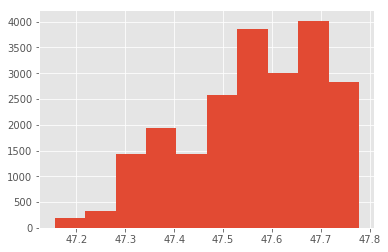

In [43]:
df.lat.hist()

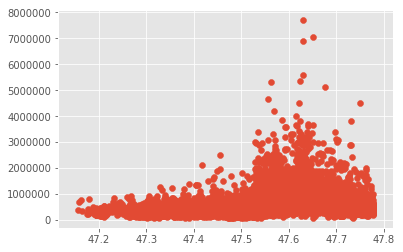

In [44]:
plt.scatter(df.lat, df.price)

No clear linearity here and I wouldn't call the data normalized. Furthermore, the data ranges through approx 1 degree of latitude, safe to drop. Lets check long

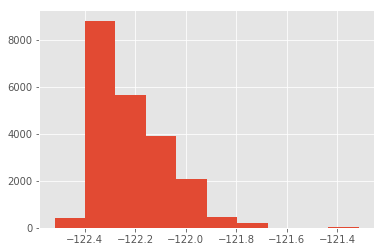

In [45]:
df.long.hist()

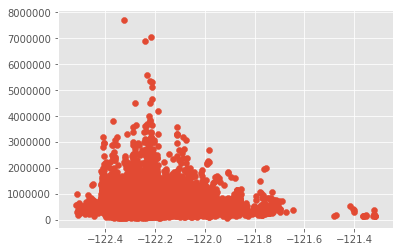

In [46]:
plt.scatter(df.long, df.price) #safe to say we can drop longitude also for the same reasons lets see zipcodes

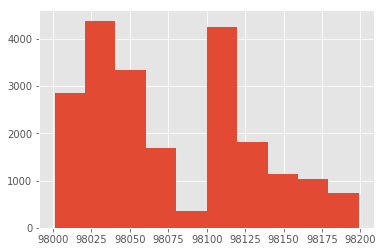

In [47]:
df.zipcode.hist()

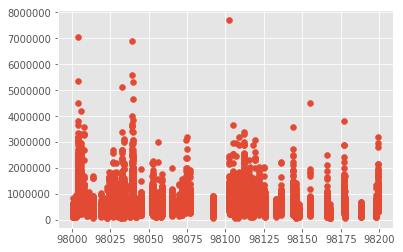

In [48]:
plt.scatter(df.zipcode, df.price) 

Again, zero linearity. Distribution is completely uneven. Worth it to remove.

In [49]:
df = df.drop(['zipcode','lat', 'long'], axis = 1)

In [50]:
#okay so what are we left with?
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'sqft_lot15'],
      dtype='object')

Off the bat...date would just be an impossible dataset to work with so lets go ahead and get rid of that too then check out scatter plots and histograms again


In [51]:
df = df.drop(['date'], axis = 1)

In [52]:
df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,sqft_lot15
0,7129300520,221900.0,3,1180,5650,1.0,3,0.0,1955,5650
1,6414100192,538000.0,3,2570,7242,2.0,3,400.0,1951,7639
2,5631500400,180000.0,2,770,10000,1.0,3,0.0,1933,8062
3,2487200875,604000.0,4,1960,5000,1.0,5,910.0,1965,5000
4,1954400510,510000.0,3,1680,8080,1.0,3,0.0,1987,7503


In [53]:
scatter = ['id', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'sqft_lot15']

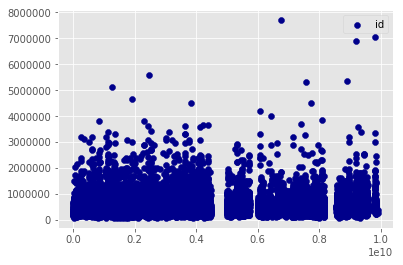

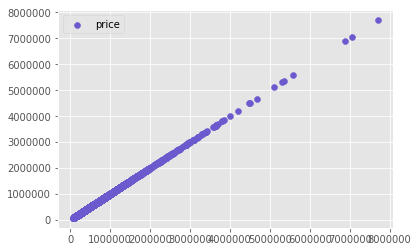

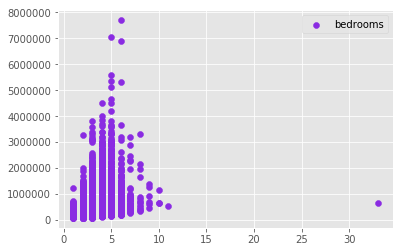

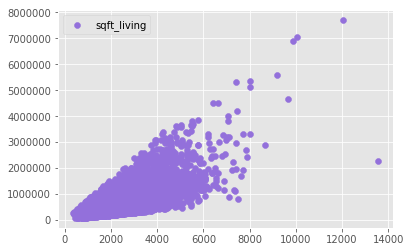

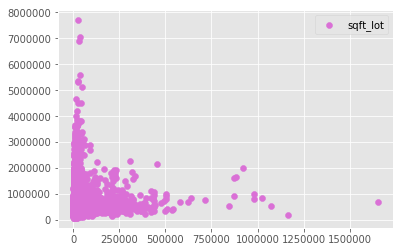

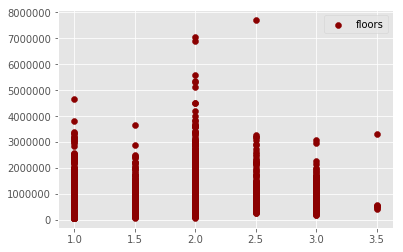

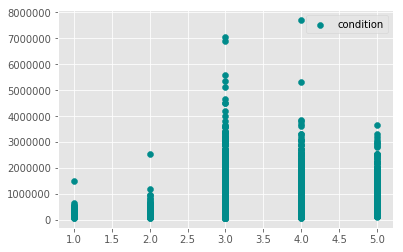

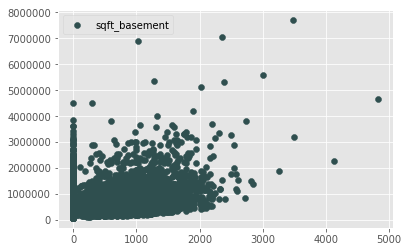

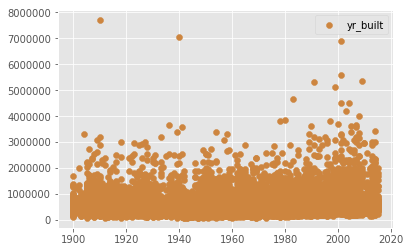

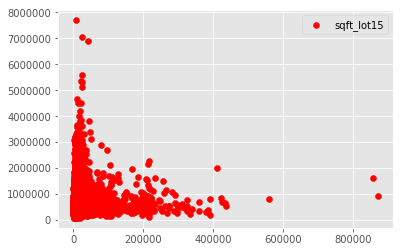

In [54]:
colors = ['darkblue', 'slateblue', 'blueviolet', 'mediumpurple', 'orchid','darkred', 'darkcyan', 'darkslategrey', 'peru', 'red']
i = 0 
for x in scatter:
    plt.scatter(df[x], df.price, label = x, color = colors[i] )
    plt.legend()
    plt.show()
    i+=1

Okay my original intuition was that the newer a house is the higher the price but that's clearly wrong. It's obvious that we can go ahead and drop that variable altogether because there is zero correlation (yr built that is). Same can be said about ID, furthermore we don't know enough about this predictor to keep it. Floors, condition, and bedrooms show the telltale lines of categorical data, however we do know that floors and bedrooms represent numerical features so it's safe to say they are not categorical. Conditions on the other hand definitely is and we'll create dummies for it. Removing some outliers from bedroom should create more defined linearity but the same cannot be said about floors. This feature will also be dropped. There's clear linearity shown on sqftliving as expected form our correlation check. But first lets drop those two vars and check histograms and QQ Plots for normal distribution.

In [55]:
df = df.drop(['id', 'yr_built','floors'], axis = 1)

# Assumption 2:  The distribution of all variables are normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26da3d68>,
      dtype=object)

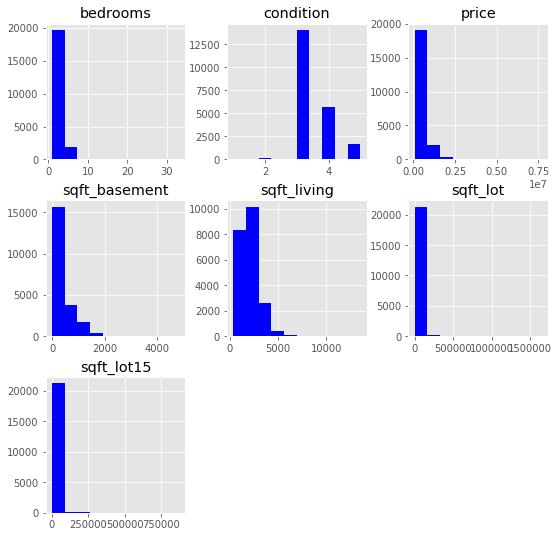

In [56]:
df.hist(figsize = (9,9), color = 'blue')

Okay the distribution for bedrooms, price, sqftbasement, sqftlivng, and both sqft lot need log transformation. Lets change condition into a categorical var and then get around to modeling :) 

In [84]:
data_log = pd.DataFrame([])
data_log['bedrooms'] = np.log(df['bedrooms'])
data_log['sqft_lot'] = np.log(df['sqft_lot'])
data_log['price'] = np.log(df['price'])
data_log['sqft_living'] = np.log(df['sqft_living'])
data_log['sqft_lot15'] = np.log(df['sqft_lot15'])
data_log['condition'] = df.condition
data_log = data_log.loc[data_log['bedrooms'] < 3] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2963ada0>,
      dtype=object)

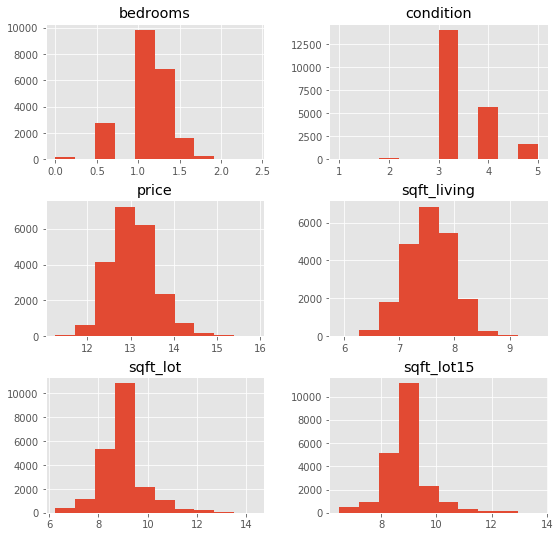

In [85]:
data_log.hist(figsize=(9,9))

Much Better!

In [86]:
condition_dummies = pd.get_dummies(data_log.condition)

In [87]:
data_log.columns


Index(['bedrooms', 'sqft_lot', 'price', 'sqft_living', 'sqft_lot15',
       'condition'],
      dtype='object')

In [88]:
data_log = data_log.drop(['condition'], axis = 1)

In [89]:
data_log = pd.concat([data_log, condition_dummies], axis=1)

In [90]:
data_log.head()

,bedrooms,sqft_lot,price,sqft_living,sqft_lot15,1,2,3,4,5
0,1.098612,8.639411,12.309982,7.073270,8.639411,0,0,1,0,0
1,1.098612,8.887653,13.195614,7.851661,8.941022,0,0,1,0,0
2,0.693147,9.210340,12.100712,6.646391,8.994917,0,0,1,0,0
3,1.386294,8.517193,13.311329,7.580700,8.517193,0,0,0,0,1
4,1.098612,8.997147,13.142166,7.426549,8.923058,0,0,1,0,0


In [91]:
data_log.info() #lets make sure my dummies are categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 10 columns):
bedrooms       21596 non-null float64
sqft_lot       21596 non-null float64
price          21596 non-null float64
sqft_living    21596 non-null float64
sqft_lot15     21596 non-null float64
1              21596 non-null uint8
2              21596 non-null uint8
3              21596 non-null uint8
4              21596 non-null uint8
5              21596 non-null uint8
dtypes: float64(5), uint8(5)
memory usage: 1.1 MB


In [92]:
for cat in data_log.iloc[:,5:].columns:
    data_log[cat] = data_log[cat].astype('category')

In [93]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 10 columns):
bedrooms       21596 non-null float64
sqft_lot       21596 non-null float64
price          21596 non-null float64
sqft_living    21596 non-null float64
sqft_lot15     21596 non-null float64
1              21596 non-null category
2              21596 non-null category
3              21596 non-null category
4              21596 non-null category
5              21596 non-null category
dtypes: category(5), float64(5)
memory usage: 1.1 MB


In [94]:
data_log = data_log.rename({1:'condition1', 2: 'condition2', 3: 'condition3', 4: 'condition4', 5: 'condition5'}, axis=1)

In [95]:
data_log.head()

,bedrooms,sqft_lot,price,sqft_living,sqft_lot15,condition1,condition2,condition3,condition4,condition5
0,1.098612,8.639411,12.309982,7.073270,8.639411,0,0,1,0,0
1,1.098612,8.887653,13.195614,7.851661,8.941022,0,0,1,0,0
2,0.693147,9.210340,12.100712,6.646391,8.994917,0,0,1,0,0
3,1.386294,8.517193,13.311329,7.580700,8.517193,0,0,0,0,1
4,1.098612,8.997147,13.142166,7.426549,8.923058,0,0,1,0,0


In [96]:
condition_cols = ['condition1', 'condition2', 'condition3', 'condition4', 'condition5']

In [97]:
condition_cols

['condition1', 'condition2', 'condition3', 'condition4', 'condition5']

In [98]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

#first I will model my data with the categoricals as the predictors and observe their r^2 to see if it's data I want to use

for col in condition_cols:
    f = "price ~" + col
    model = smf.ols(formula= f, data= data_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     30.06
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           4.24e-08
Time:                        08:33:31   Log-Likelihood:                -16777.
No. Observations:               21596   AIC:                         3.356e+04
Df Residuals:                   21594   BIC:                         3.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0489      0.004   36

In [99]:
#easy to see that none of my categoricals have an r squared > .01, in order to avoid singularity i will drop the column with the lowest rsquared

In [100]:
condition_cols.pop(0)

'condition1'

In [101]:
condition_cols

['condition2', 'condition3', 'condition4', 'condition5']

In [102]:
for col in condition_cols:
    f = "price ~" + col
    model = smf.ols(formula= f, data= data_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           8.16e-37
Time:                        08:33:33   Log-Likelihood:                -16711.
No. Observations:               21596   AIC:                         3.343e+04
Df Residuals:                   21594   BIC:                         3.344e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0522      0.004   36

Same results, I won't use these in my final model

# Assumption 3 and 4

3) The data is homeocedastic


4) The relationship between the independent and dependent variable must be linear

Now that we have narrowed our data down to four predictors for our target, price. Our next step would be to see which of our four predictors best meet these assumptions

In [103]:
features = data_log.copy()

In [104]:
features = features.drop(['price', 'condition1', 'condition2', 'condition3', 'condition4','condition5'], axis = 1)

Lets use visualizations to see how our well features meet assumptions 3 and 4

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricebedrooms
-------------------------------------------------------------------------------------


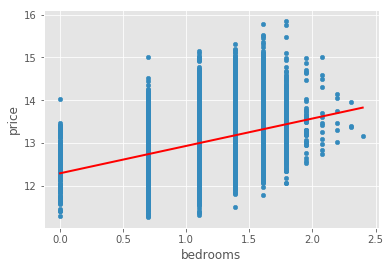

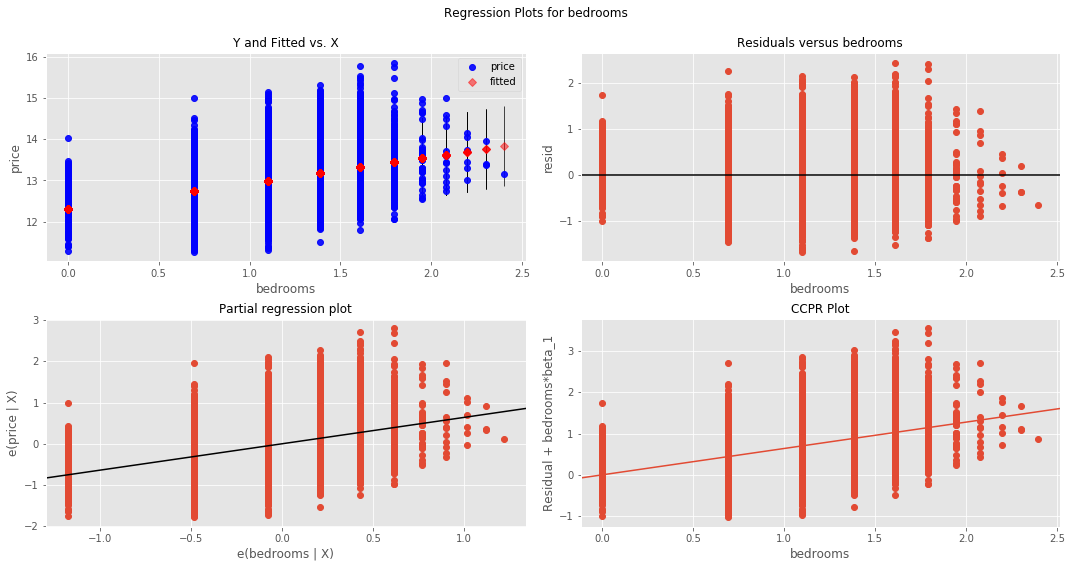

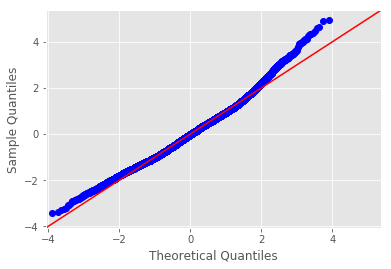

Press Enter to Continure
KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_lot
-------------------------------------------------------------------------------------


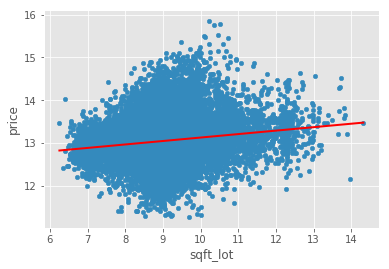

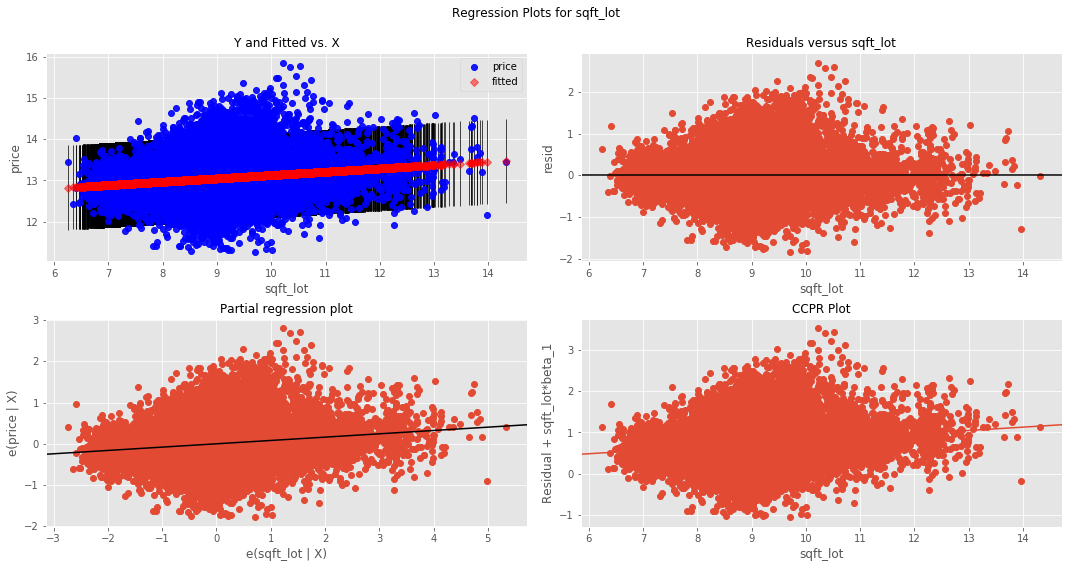

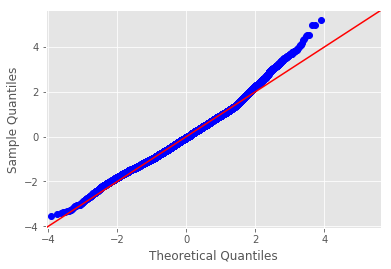

Press Enter to Continure
KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_living
-------------------------------------------------------------------------------------


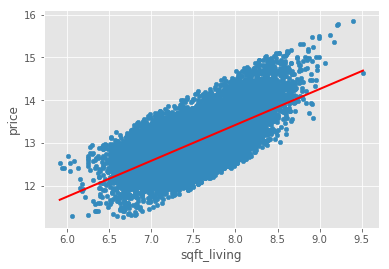

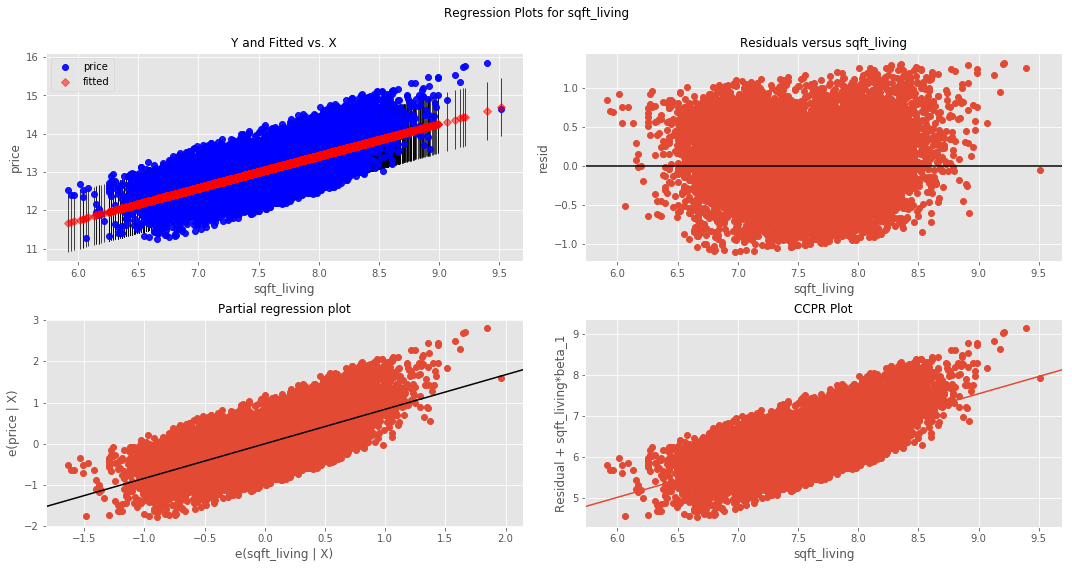

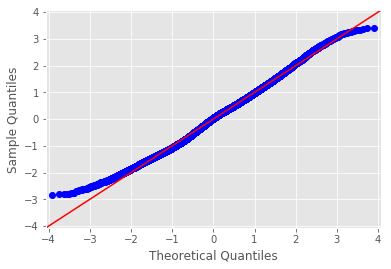

Press Enter to Continure
KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_lot15
-------------------------------------------------------------------------------------


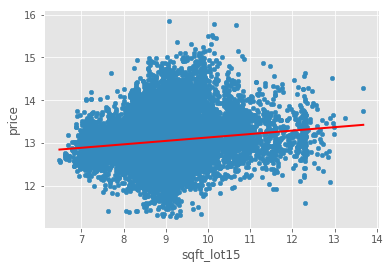

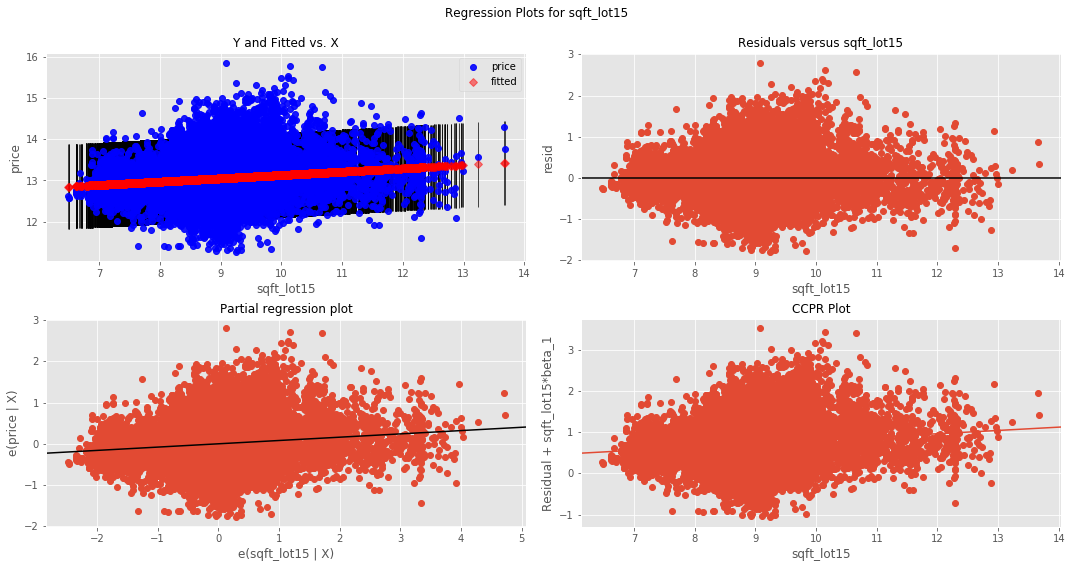

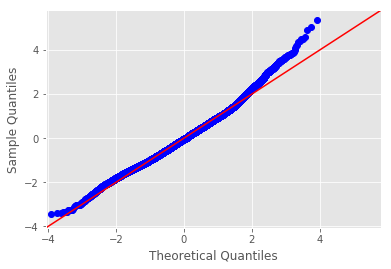

Press Enter to Continure


In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms



for idx, val in enumerate(features):
    print ("KC Housing DataSet - Regression Analysis and Diagnostics for formula: price" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
   
    model = smf.ols(formula=f, data=data_log).fit()
    
    X_new = pd.DataFrame({val: [data_log[val].min(), data_log[val].max()]});
    preds = model.predict(X_new)
    data_log.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    input('Press Enter to Continure')

Examining the graphs above:
1) The Q-Q plots show us that all of the variables have normal distribution

2) The residuals plot shows homeoscedasicity among all the variables except for bedrooms. I find that it's evenly distributed enough to keep it though

3) The scatter plots show us only one variable can truly be described as linear, sqft_living. The other two will also be eliminated as our best feature

It's clear to me that the only variable that truly meets all the assumption of linear regression is sqft_living. I will further validate this by running a recursive feature elimination to see if the same variable is chosen

In [153]:
final_df = pd.DataFrame([])
final_df = data_log
final_df = final_df.drop(['condition1', 'condition2', 'condition3', 'condition4','condition5'], axis = 1)


In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
final_features = final_df.drop(['price'], axis = 1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 1)
selector = selector.fit(final_features, final_df["price"])

In [155]:
final_features.columns

Index(['bedrooms', 'sqft_lot', 'sqft_living', 'sqft_lot15'], dtype='object')

In [156]:
selector.support_

array([False, False,  True, False])

RFE also chooses sqft_living as the best feature. We will build our final model using all four of our features but the assumption remains that sqft_living will have the best predictor values for price.

In [157]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

fetch = data_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value',]]
for idx, val in enumerate(fetch):
    print ("KC Housing Data - Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
  
    model = smf.ols(formula=f, data=data_log).fit()
    
    X_new = pd.DataFrame({val: [data_log[val].min(), data_log[val].max()]});
    predsb = model.predict(X_new)

    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], model.tvalues[1]])
    
    print(results[idx+1])


KC Housing Data - Regression Analysis and Diagnostics for formula: price~bedrooms
-------------------------------------------------------------------------------------
['bedrooms', 0.1177554944288356, 12.295530897041026, 0.6390910902821537, 0.0, 53.68619907776315]
KC Housing Data - Regression Analysis and Diagnostics for formula: price~sqft_lot
-------------------------------------------------------------------------------------
['sqft_lot', 0.019118960510224103, 12.322625085043404, 0.08071030805712154, 1.1874902987196926e-92, 20.515897318728268]
KC Housing Data - Regression Analysis and Diagnostics for formula: price~sqft_living
-------------------------------------------------------------------------------------
['sqft_living', 0.45538255333874933, 6.723249604521759, 0.837660498964689, 0.0, 134.37205764613725]
KC Housing Data - Regression Analysis and Diagnostics for formula: price~sqft_lot15
-------------------------------------------------------------------------------------
['sqft

So in this model we find that the feature that has the highest impact on pricei s sqft_living. Now, we'll run a model with the variables we previously dropped due to their high collinearity with sqft_living, they are 'sqft_living15', 'grade', 'sqft_above', 'bathrooms'. In this model we will omit sqft_living. 

In [158]:
ndf = pd.read_csv('kc_house_data.csv') # load the original dataframe into a new dataframe

In [159]:
ndf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [160]:
ndf = ndf.drop(['condition', 'id', 'date', 'sqft_living','floors', 'waterfront', 'view', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long' ], axis = 1) #drop the features we eliminated in our first model as well as sqft_living

In [161]:
ndf.head()

,price,bedrooms,bathrooms,sqft_lot,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,7,1180,0.0,1340,5650
1,538000.0,3,2.25,7242,7,2170,400.0,1690,7639
2,180000.0,2,1.00,10000,6,770,0.0,2720,8062
3,604000.0,4,3.00,5000,7,1050,910.0,1360,5000
4,510000.0,3,2.00,8080,8,1680,0.0,1800,7503


In [162]:
abs(ndf.corr())>.74 #check for multicollinearity. Grade and sqft_above are multicollinear. Let's delete grade as it is categorical

,price,bedrooms,bathrooms,sqft_lot,grade,sqft_above,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False
grade,False,False,False,False,True,True,False,False
sqft_above,False,False,False,False,True,True,False,False
sqft_living15,False,False,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,True


In [163]:
ndf = ndf.drop(['grade'], axis = 1)

In [164]:
abs(ndf.corr()) > .74

,price,bedrooms,bathrooms,sqft_lot,sqft_above,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False
sqft_lot,False,False,False,True,False,False,False
sqft_above,False,False,False,False,True,False,False
sqft_living15,False,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2edd9e80>,
      dtype=object)

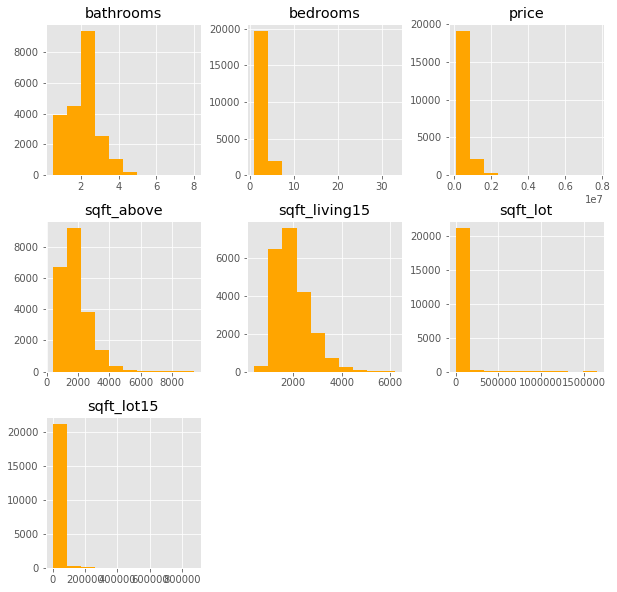

In [179]:
ndf.hist(figsize=(10,10), color = 'orange')

In [166]:
log_ndf = pd.DataFrame([])
log_ndf['bathrooms'] = np.log(ndf.bathrooms)
log_ndf['bedrooms'] = np.log(ndf.bedrooms)
log_ndf['sqft_above'] = np.log(ndf.sqft_above)
log_ndf['sqft_living15'] = np.log(ndf.sqft_living15)
log_ndf['sqft_lot'] = np.log(ndf.sqft_lot)
log_ndf['sqft_lot15'] = np.log(ndf.sqft_lot15)
log_ndf['price'] = np.log(ndf.price)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2e3b0160>,
      dtype=object)

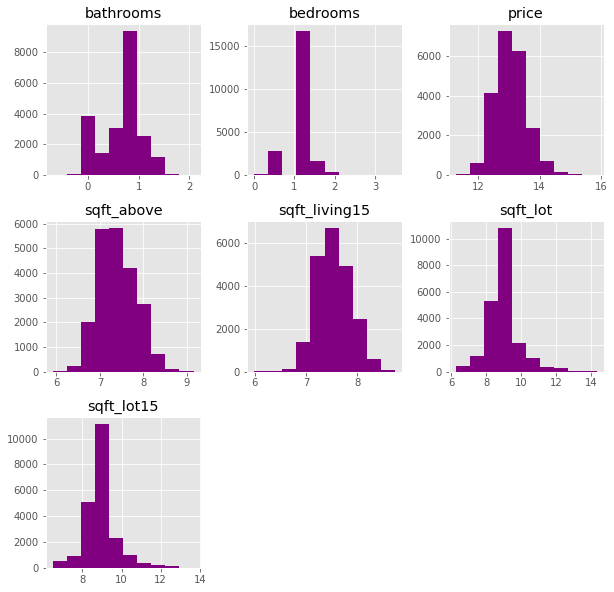

In [180]:
log_ndf.hist(figsize = (10,10), color = 'purple')

KC Housing Data - Regression Analysis and Diagnostics for formula: price~bathrooms
-------------------------------------------------------------------------------------


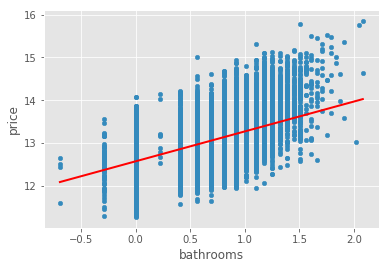

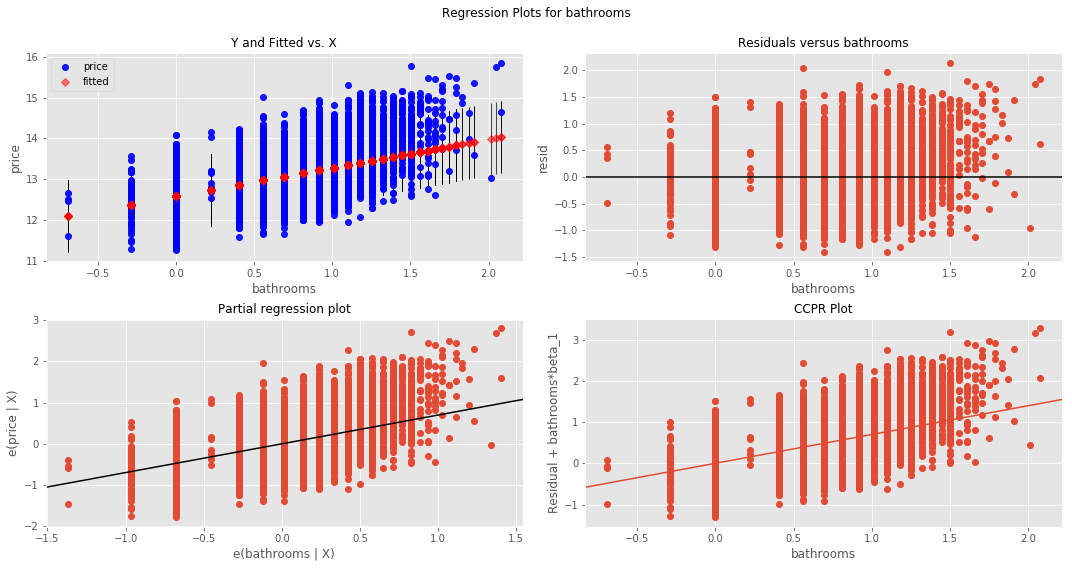

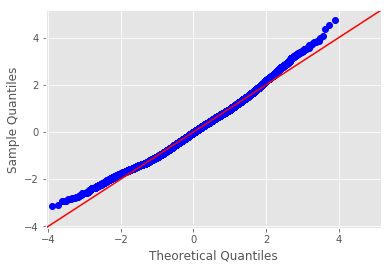

KC Housing Data - Regression Analysis and Diagnostics for formula: price~bedrooms
-------------------------------------------------------------------------------------


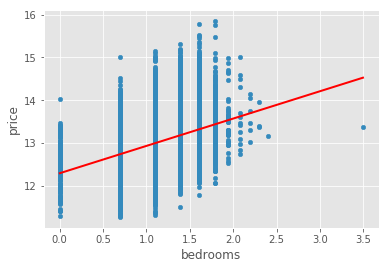

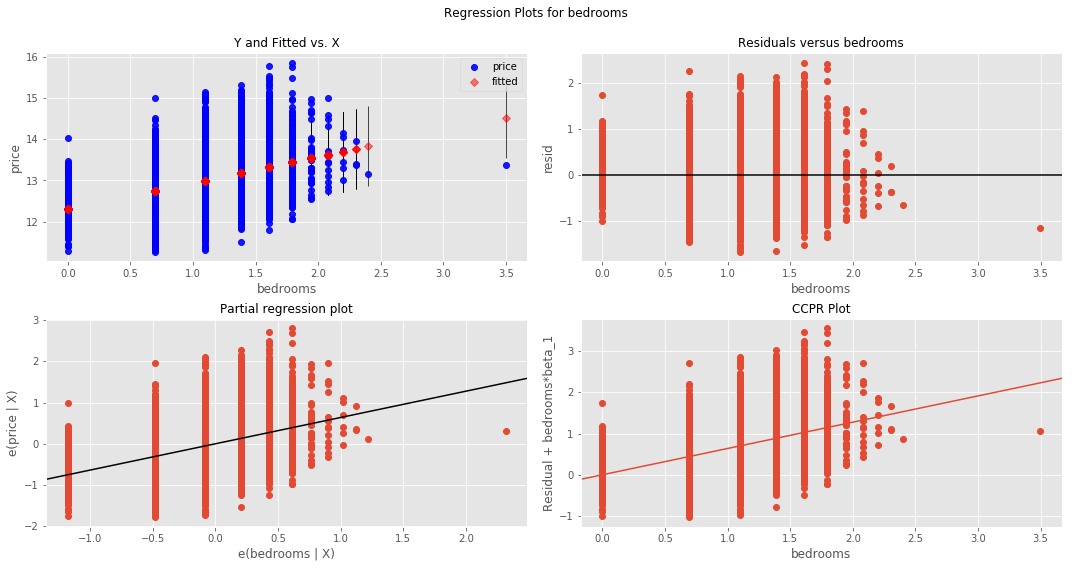

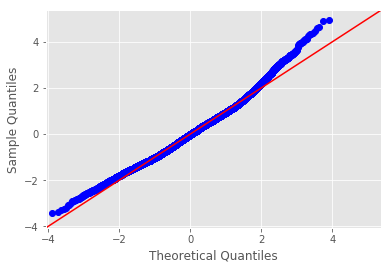

KC Housing Data - Regression Analysis and Diagnostics for formula: price~sqft_above
-------------------------------------------------------------------------------------


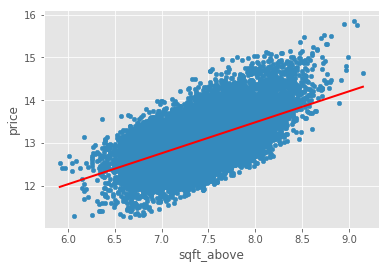

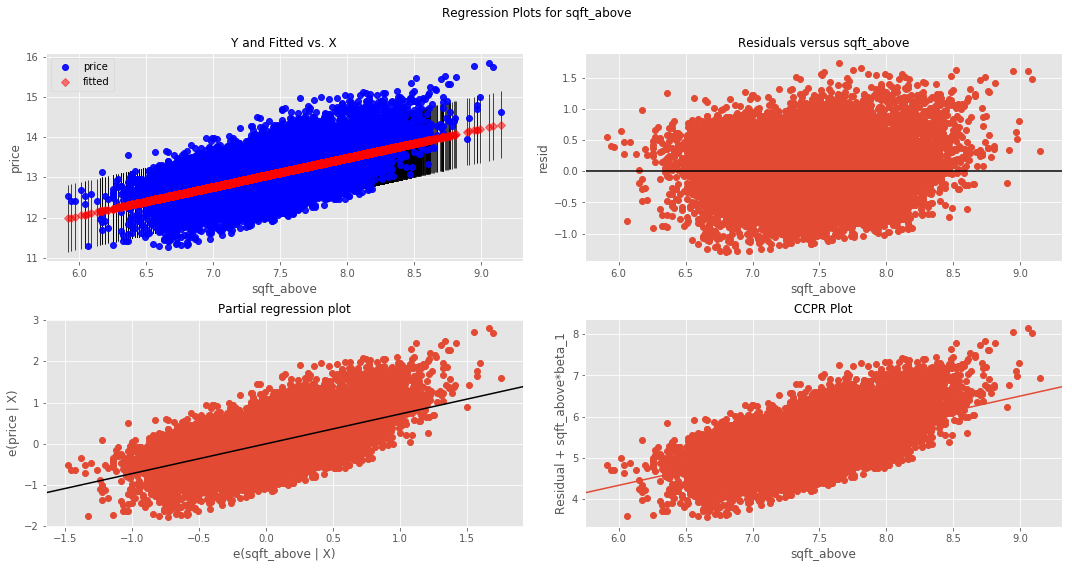

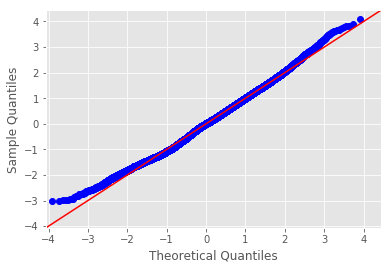

KC Housing Data - Regression Analysis and Diagnostics for formula: price~sqft_living15
-------------------------------------------------------------------------------------


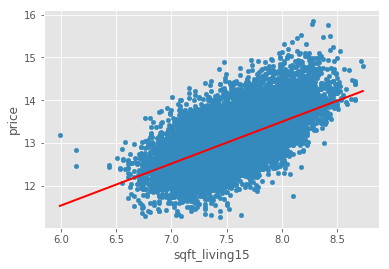

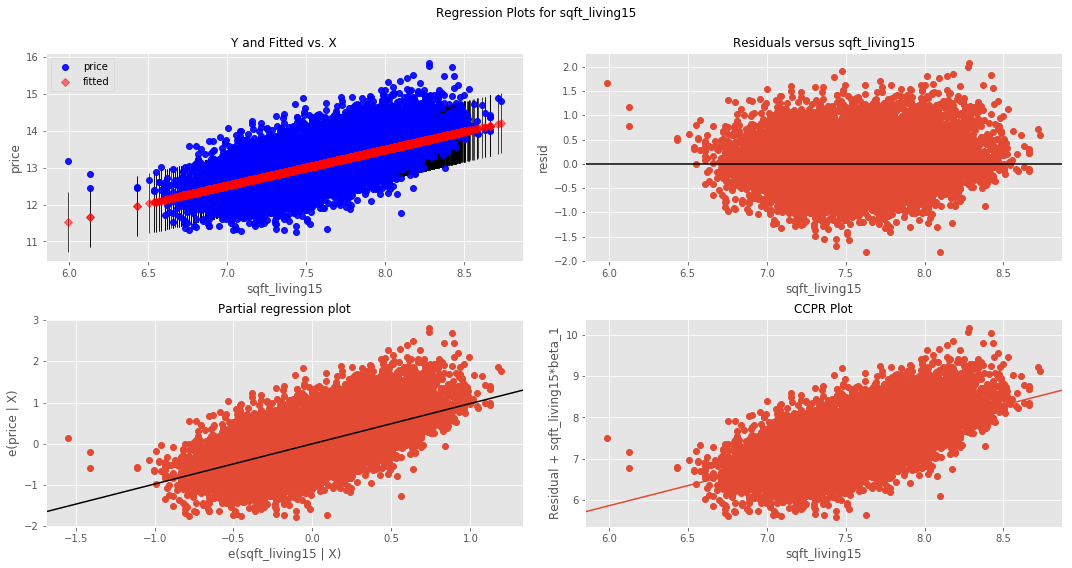

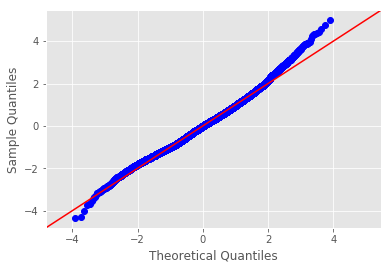

KC Housing Data - Regression Analysis and Diagnostics for formula: price~sqft_lot
-------------------------------------------------------------------------------------


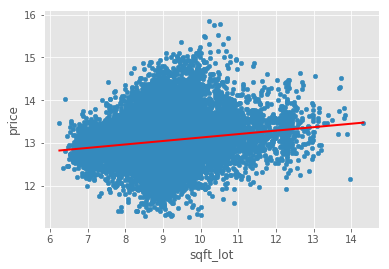

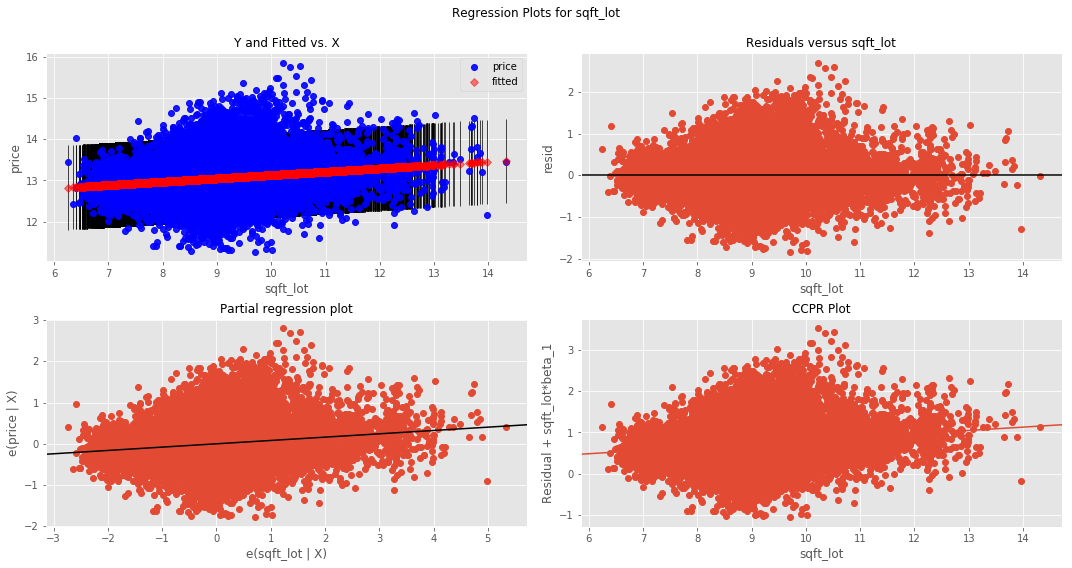

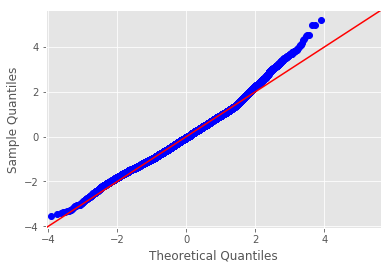

KC Housing Data - Regression Analysis and Diagnostics for formula: price~sqft_lot15
-------------------------------------------------------------------------------------


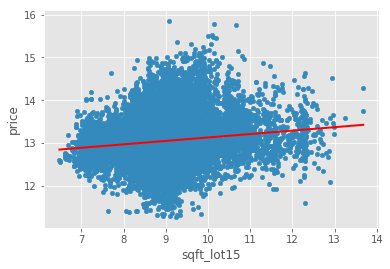

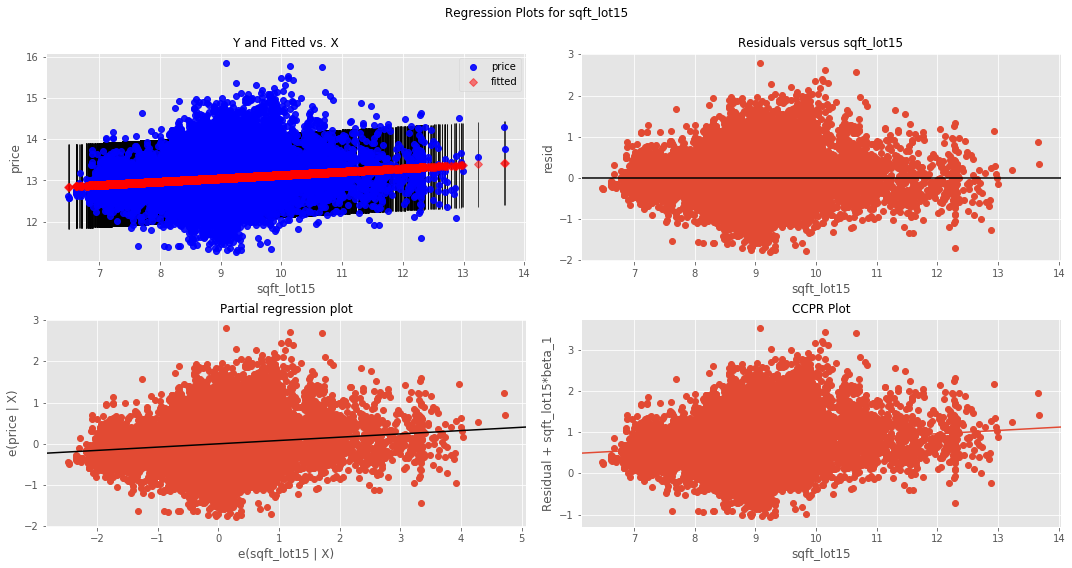

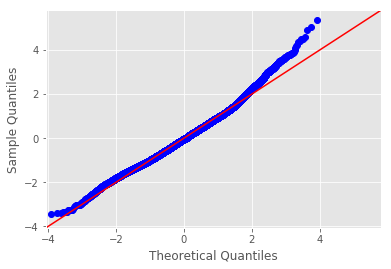

In [174]:
fetch = log_ndf.describe().columns.drop(['price'])
resultsII = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value',]]
for idx, val in enumerate(fetch):
    print ("KC Housing Data - Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
  
    model = smf.ols(formula=f, data=log_ndf).fit()
    
    X_new = pd.DataFrame({val: [log_ndf[val].min(), log_ndf[val].max()]});
    preds = model.predict(X_new)


    log_ndf.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    
    resultsII.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], model.tvalues[1]])
    
    
    



In [175]:
pd.DataFrame(resultsII)


,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,NaN
1,bathrooms,0.27069,12.5752,0.698008,0,89.527431
2,bedrooms,0.117546,12.2973,0.637537,0,53.633378
3,sqft_above,0.343411,7.70593,0.722404,0,106.276411
4,sqft_living15,0.368636,5.68755,0.97628,0,112.288517
5,sqft_lot,0.019116,12.3227,0.0807046,1.21474e-92,20.514768
6,sqft_lot15,0.0153042,12.3299,0.0801615,2.09e-74,18.320252


In [170]:
pd.DataFrame(results)


,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,NaN
1,bedrooms,0.117755,12.2955,0.639091,0,53.686199
2,sqft_lot,0.019119,12.3226,0.0807103,1.18749e-92,20.515897
3,sqft_living,0.455383,6.72325,0.83766,0,134.372058
4,sqft_lot15,0.0153091,12.3298,0.0801743,1.99612e-74,18.322796


In summation, we obtained a dataset of King County house sales that illustrated the price of properties in this county vs. features including : 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors',waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15'. 

Scrubbing the data involved examining if there were any null values or placeholder values that might skew our analysis. In this step of the process we found that some series had been incorrectly cast as strings and that there were a few series with null values present. We scrubbed our data by replacing null-values with median values and casting series as the correct datatypes

In the exploration phase of the analysis I first checked for multicollinearity between features. I found that the bathroom, sqft_above, and sqft_living15 had high correlation with sqft_living. Although the easier choice would have been to drop the sqft_living dataset I also noticed that this feature had the highest correlation with price which led me to decide to keep it and drop the other three. I then compared histograms all across and dropped the year, waterfront, and view features as most of the data logged had a value of '0' making these events rare and neglible when predicting price. After that I examined features pertaining to location. Examination of their histograms and plots showed irregular distribution all across and little to no linearity leading me to drop these features as well. I noticed that floors, bathrooms, and condition had scatterplots that the telltale plots of categorical data. Floors and bedrooms showed are obviously representative of numerical data. Floors showed zero to no linearity so it was dropped. Bedrooms had some outliers that needed to be removed but otherwise showed some signs of linearity. I then log-normalized our remaining features and created categorical dummies out of conditions. Running an analysis of price vs conditions showed that these values yielded very low r-squared values, leading me to decide to not include them in my final model. Finally, I examined residuals and linear plots and determined that our best feature is sqft_living. I recursive feature elimination to validate this and built my model.


Looking at the our results it is pretty apparent that there is a significant relationship between square footage and price. A T-value of 134 tells us that these results are repeatable and a p-value of 0.0 shows us that this relationship very likely did not occur due to chance. Furthermore, our slope shows us that with 
every 1,000 squarefoot added we can predict the price of the house to increase by log 830 on average.  

Sqft_lot and sqft_lot 15 have the next highest impact on price. Every 1000 squarefoot added to the lot increases the price by log 800 

That leaves us with bedrooms. With each bedroom added we only have a price raise of log .64 . However, it is worth it to note that bedroom prices peak in houses with 1.5 to 2 bedrooms.

After going over these results I decided that I would build a second model incorporating the predictors I dropped previously, sqft_above, sqft_living15, grade and bathroom. I will keep all the predictors from my original model except for sqft_living which shares high instances of collinearity with these vars. Upon checking my second model for correlation between predictors I found that sqft_above and grade were highly correlated, I dropped grade due to it's categorical nature. Afterwards, I log normalized all my distributions and ran my model. My findings were as follows

sqft_living15 has the highest slope indicating an increase of log 970 for every square foot added.
sqft_above calls for an increase of log 720 in price for every 1,000 sqft added
every bathroom added will raise the price by log.69

Both models have shown me the same thing. Overall sqarefootage of a property has the highest impact on price. All the variables we found to be strong predictors all allude to the idea of a larger home. Ultimately, the stakeholders have it in their best interest to build large homes. 

In [ ]:
	ind_var	r_squared	intercept	slope	p-value	NaN
1	bathrooms	0.27069	12.5752	0.698008	0	89.527431
2	bedrooms	0.117546	12.2973	0.637537	0	53.633378
3	sqft_above	0.343411	7.70593	0.722404	0	106.276411
4	sqft_living15	0.368636	5.68755	0.97628	0	112.288517
5	sqft_lot	0.019116	12.3227	0.0807046	1.21474e-92	20.514768
6	sqft_lot15	0.0153042	12.3299	0.0801615	2.09e-74	18.320252
